In [1]:
#Import all the required packages

In [2]:
#Pandas data is short for panel data that help to manipulate data in python
import pandas as pd
#Numpy is help to generate random numbers and do other many things
import numpy as np
#Preprocessing package from sklearn gives us functions for scaling the data before performing PCA
from sklearn.preprocessing import StandardScaler
#Use pyplot library as plt for the ploting data as graphs
import matplotlib.pyplot as plt 

In [3]:
#Import the Bread Cancer dataset

In [4]:
data = pd.read_csv("datafile.csv")

In [5]:
#Get header values in the table

In [6]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# remove the 1st attribute from the table and replace the 2 with -1 and 4 with +1

In [8]:
#df['Class'].replace(2, '-1',inplace=True)
#df['Class'].replace(4, '+1',inplace=True)
diag_map = {4: 1.0, 2: -1.0}
data['Class'] = data['Class'].map(diag_map)

data= data.drop(labels='Sample code number', axis=1)

In [9]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,-1.0
1,5,4,4,5,7,10,3,2,1,-1.0
2,3,1,1,1,2,2,3,1,1,-1.0
3,6,8,8,1,3,4,3,7,1,-1.0
4,4,1,1,3,2,1,3,1,1,-1.0


In [10]:
#Get the value for the x any Y coordinates

In [11]:
x = data.drop(labels='Class', axis=1).values
y = data['Class'].values

In [12]:
print(y)

[-1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1.
 -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
 -1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1

In [13]:
#Print the number of columns and rows for each x any y coordiante have

In [14]:
print(x.shape, y.shape)

(699, 9) (699,)


In [15]:
#Implementation of PCA with a covariance Matrix
#Define a class as convers_pca
class convers_pca():
  #initialize the number of components, eigen values and eigen vectors
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    # Generates the coordinates for a PCA graph bases on the mean and projection matrix data.
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    #transform the sources back to the mixed data (apply mixing matrix).
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    #Fit the data using self object and the train data x  array like sample that contains the number of samaples
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        # Translate the dataset so it's centered around 0
        self.mean = np.mean(x, axis=0)
        
        #Calculate the covariance matrix
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        #eigendecomposition get through using the eigen vectors and eigen values from the covariance matrix
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        #project data point onto selected eigen vector
        self.eigen_vectors = self.eigen_vectors.T
        
        #Indirect sort along the given axis
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        #This will show the amount of variance explained by each of the selected components
        self.explained_variance = self.eigen_values[self.sorted_components]
        #Percentage of variance explained by each selected array components
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [16]:
#Standardization of x
#remove the mean and scaling to unit variance using the standardscaler. It helps to rescaling feature vectors to all have the same scale
std = StandardScaler()
# From the fit_transorm, the training data will be  scale and help to scalaling parameters of that data
transformed = StandardScaler().fit_transform(x)

In [17]:
#PCA with 2 components

In [18]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [19]:
#Check eigenvectors:
pca.eigen_vectors

array([[-0.30292446, -0.38127363, -0.37760282, -0.33292274, -0.33653384,
        -0.33285064, -0.34597842, -0.33586575, -0.22998763],
       [ 0.14728724,  0.04994886,  0.08532737,  0.04501348, -0.1633891 ,
         0.24637458,  0.22997335, -0.02525521, -0.90861576],
       [-0.00171985, -0.73632898,  0.66500091,  0.04612047,  0.06807047,
        -0.07092611,  0.05811865, -0.01901354,  0.00774395],
       [-0.86193801,  0.0207124 , -0.03317637,  0.41972041,  0.11175896,
        -0.00913366,  0.19829425,  0.13438809, -0.09702428],
       [-0.07974264,  0.20267222,  0.176675  , -0.46800847,  0.36301869,
        -0.55271696, -0.0033783 ,  0.45696771, -0.23708563],
       [ 0.07647456, -0.13753297, -0.10499726,  0.04604803, -0.68838416,
        -0.13055944,  0.25734531,  0.62219668,  0.13348277],
       [-0.24290868,  0.4391189 ,  0.58493756, -0.12290104, -0.45009176,
         0.10967743, -0.41000684, -0.07981509,  0.04272658],
       [ 0.26773717,  0.12149144,  0.05060655,  0.67131862, -0

In [20]:
#Check eigenvalues
pca.eigen_values

array([5.89550882, 0.77524353, 0.089039  , 0.53961267, 0.4685087 ,
       0.38135328, 0.2621991 , 0.30460153, 0.29682735])

In [21]:
#Check sorted component
pca.sorted_components

array([0, 1, 3, 4, 5, 7, 8, 6, 2], dtype=int64)

<Figure size 432x288 with 0 Axes>

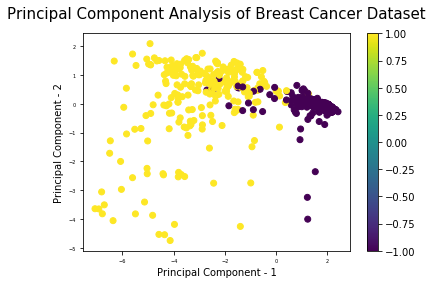

In [22]:
#transform method use the same mean and variance as it is calculated from the training data to transform the test data. 
x_std = pca.transform(transformed)
plt.figure()
plt.figure(figsize=(6, 4))
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15, pad=15)
## Plot data points using their class
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
plt.colorbar()
